# Classification Models with Keras

### Step 1. Import Packages

In [1]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils  import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2023-08-15 14:31:31.003193: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Step 2. Dataset: MNIST

In [2]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# confirm the number of images in each set.
## 60,000 images in X_train
## 10,000 images in X_test

# each image is 28 pixels x 28 pixels
X_train.shape

(60000, 28, 28)

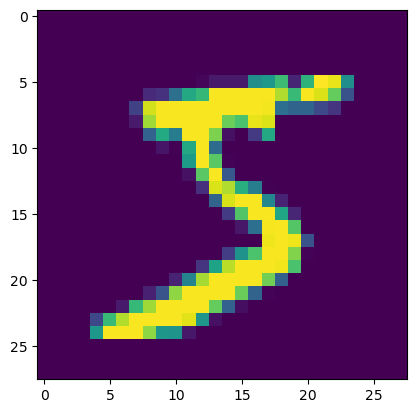

In [4]:
plt.imshow(X_train[0])

### Step 3. Data preprocessing

In [5]:
### Multi-Dim -> 1D ###

# In order to feed the image as input to the convolutional neural networks
# we need to flatten the images into 1D vectors: 
# each of size 1 x (28 x 28) = 1 x 784

# Flatten Images into 1D vector
num_pixels = X_train.shape[1] * X_train.shape[2] 

# flatten the training images
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype("float32")

# flatten the testing images
X_test  = X_test.reshape(X_test.shape[0], num_pixels).astype("float32")


In [6]:
### normalization ###
# normalize the pixel values range from 0 to 255
# to the range 0 to 1

X_train = X_train / 255
X_test  = X_test  / 255

In [7]:
### Divide the target variable into categories ###
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


### Step 4. Build a Neural Network

In [8]:
# Define the classification model
def classification_model():
    # Create the model 
    model = Sequential()
    model.add(Dense(num_pixels, activation = "relu", input_shape = (num_pixels,)))
    model.add(Dense(100, activation = "relu"))
    model.add(Dense(num_classes, activation = "softmax"))
    
    # Compile the model
    model.compile(optimizer = "adam", loss = "categorical_crossentropy")
    return model

### Step 5. Train and Test the Network

In [9]:
# Build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, 
          validation_data = (X_test, y_test), 
          epochs = 10, verbose = 2)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose = 0)

Epoch 1/10
1875/1875 - 7s - loss: 0.1838 - val_loss: 0.1028 - 7s/epoch - 4ms/step
Epoch 2/10
1875/1875 - 7s - loss: 0.0765 - val_loss: 0.0891 - 7s/epoch - 4ms/step
Epoch 3/10
1875/1875 - 7s - loss: 0.0540 - val_loss: 0.0695 - 7s/epoch - 3ms/step
Epoch 4/10
1875/1875 - 6s - loss: 0.0400 - val_loss: 0.0773 - 6s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 7s - loss: 0.0334 - val_loss: 0.0838 - 7s/epoch - 4ms/step
Epoch 6/10
1875/1875 - 6s - loss: 0.0253 - val_loss: 0.0708 - 6s/epoch - 3ms/step
Epoch 7/10
1875/1875 - 7s - loss: 0.0224 - val_loss: 0.0806 - 7s/epoch - 4ms/step
Epoch 8/10
1875/1875 - 7s - loss: 0.0206 - val_loss: 0.0726 - 7s/epoch - 4ms/step
Epoch 9/10
1875/1875 - 7s - loss: 0.0163 - val_loss: 0.0921 - 7s/epoch - 4ms/step
Epoch 10/10
1875/1875 - 7s - loss: 0.0176 - val_loss: 0.0910 - 7s/epoch - 4ms/step


In [15]:
# print the accuracy and the corresponding error
print("Accuracy: {}% \n Error: {}".format(scores, 1 - scores))

Accuracy: 0.09104203432798386% 
 Error: 0.9089579656720161


In [12]:
# Save the model
# since the model contains multi-dimensional arrays of data
# the model should be then saved to .h5 files

model.save("classification_model.h5")

In [14]:
from keras.models import load_model
pretained_model = load_model("classification_model.h5")

### Example
If you model looks like this:
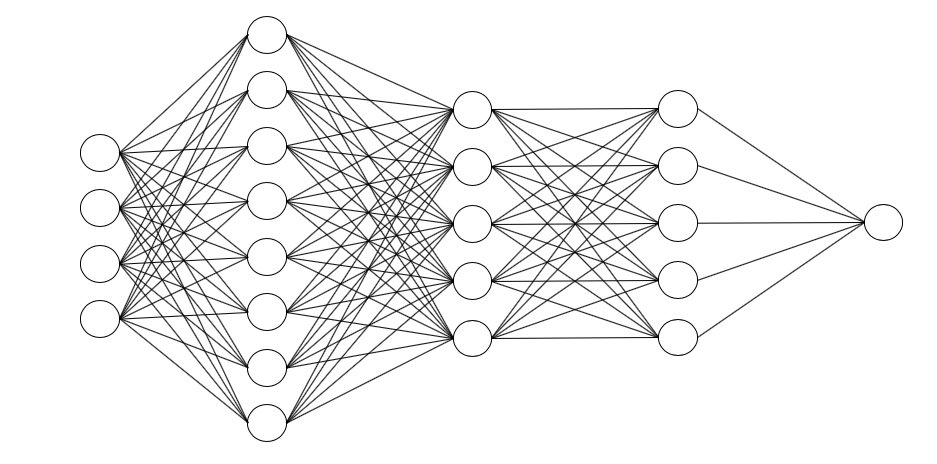

Then the keras model should be built like:

In [ ]:
"""model = Sequential()
model.add(Dense(8, activation = "relu", input_shape = (4, )))
model.add(Dense(5, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1))"""